In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# Define the correlation coefficient
rng = np.random.default_rng()
rho = 0.8

# Create the correlation matrix
R = np.array([[1, rho],
              [rho, 1]])

# Cholesky decomposition
A = np.linalg.cholesky(R)

# Generate independent standard normal random variables
Z = (rng.standard_normal(size=(1000,2))).T  # 1000 samples for each variable

# Create correlated normal random variables
X = A.dot(Z)

# Transform to uniform marginals using the CDF of the standard normal
U = stats.norm.cdf(X)

t = np.arange(0,1.00,0.001)
sig = np.array([[0.2], [0.3]])
S0 = np.array([[30], [15]])
r = 0.03
S_t = np.zeros((2,100))
t_tile = np.tile(t,(2,1))
S_t = S0*np.exp((r - (1/2)*sig**2)*t_tile + sig * np.cumsum(X,axis = 1))

#S_t[asset, i] = S_t[asset, i-1] * np.exp((r - 0.5 * sig[asset, 0]**2) * (t[i] - t[i-1]) + sig[asset, 0] * np.sqrt(t[i] - t[i-1]) * X[asset, i-1])


IndexError: index 2 is out of bounds for axis 0 with size 2

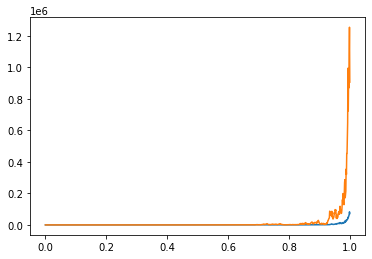

In [4]:
for i in range(len(t)):
    plt.plot(t,S_t[i,:])

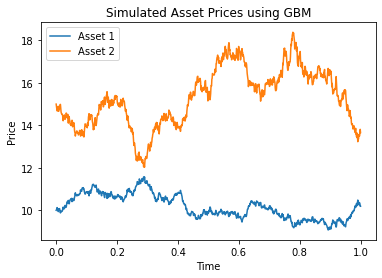

In [5]:
import numpy as np
from scipy.stats import norm

# Parameters
rho = -0.8  # Correlation coefficient
R = np.array([[1, rho], [rho, 1]])  # Correlation matrix
n_samples = 1000
n_assets = 2

# Cholesky decomposition
A = np.linalg.cholesky(R)

# Generate independent standard normal random variables
rng = np.random.default_rng()
Z = rng.standard_normal(size=(n_samples, n_assets))

# Create correlated normal random variables
X = Z.dot(A.T)  # Each column is a series of correlated random variables

# Simulation parameters
t = np.linspace(0, 1, 1000)  # Time grid
dt = np.diff(t)  # Time increments
S0 = np.array([10, 15])  # Initial prices
r = 0.03  # Risk-free rate
sig = np.array([0.2, 0.3])  # Volatilities

# Preallocate price matrix
S_t = np.zeros((len(t), n_assets))
S_t[0, :] = S0

# Simulate prices
for i in range(1, len(t)):
    Z = rng.standard_normal(n_assets).dot(A.T)  # Correlated random variables for this time step
    S_t[i, :] = S_t[i-1, :] * np.exp((r - 0.5 * sig**2) * dt[i-1] + sig * np.sqrt(dt[i-1]) * Z)

# Example: plotting the simulated asset prices
import matplotlib.pyplot as plt

plt.plot(t, S_t)
plt.title('Simulated Asset Prices using GBM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Asset 1', 'Asset 2'])
plt.show()


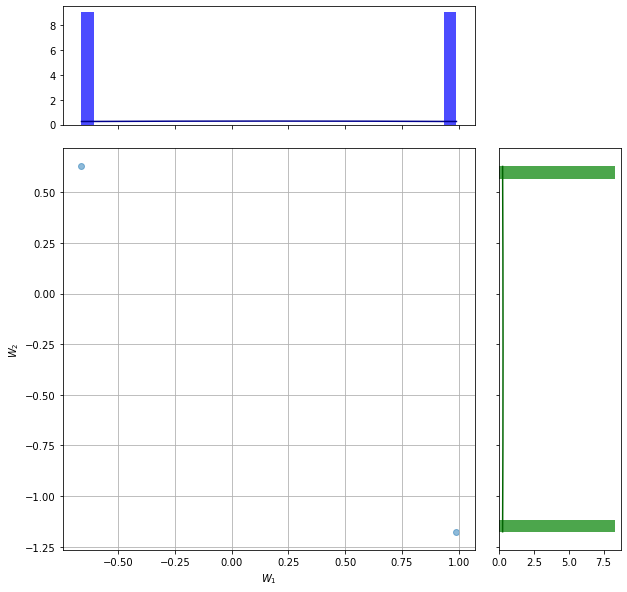

In [6]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x_dist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_y_dist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Main scatter plot
ax_main.scatter(X[0, :], X[1, :], alpha=0.5)
ax_main.grid(True)
ax_main.set_xlabel('$W_1$')
ax_main.set_ylabel('$W_2$')

# Hide the tick labels for marginal plots
ax_x_dist.tick_params(axis="x", labelbottom=False)
ax_y_dist.tick_params(axis="y", labelleft=False)

# Plot X distribution (top)
ax_x_dist.hist(X[0, :], bins=30, density=True, alpha=0.7, color='blue')
kde_x = stats.gaussian_kde(X[0, :])
x_vals = np.linspace(min(X[0, :]), max(X[0, :]), 1000)
ax_x_dist.plot(x_vals, kde_x(x_vals), color='darkblue')

# Plot Y distribution (right)
ax_y_dist.hist(X[1, :], bins=30, density=True, alpha=0.7, color='green', orientation='horizontal')
kde_y = stats.gaussian_kde(X[1, :])
y_vals = np.linspace(min(X[1, :]), max(X[1, :]), 1000)
ax_y_dist.plot(kde_y(y_vals), y_vals, color='darkgreen')

plt.show()

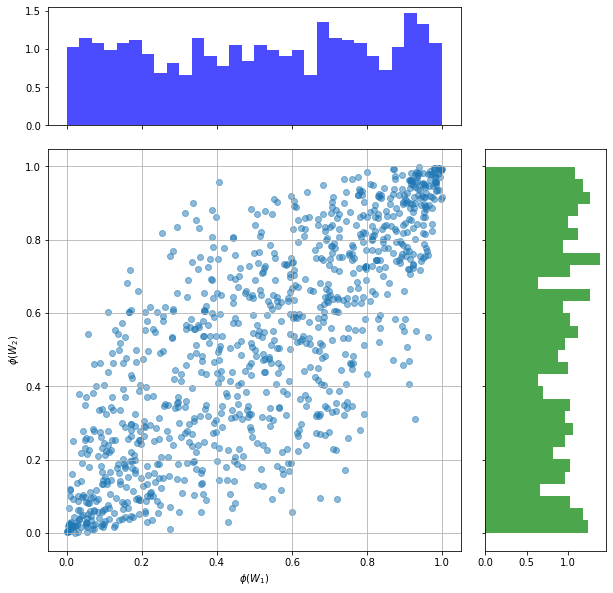

In [7]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x_dist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_y_dist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Main scatter plot
ax_main.scatter(U[0, :], U[1, :], alpha=0.5)
ax_main.grid(True)
ax_main.set_xlabel('$\phi(W_1)$')
ax_main.set_ylabel('$\phi(W_2)$')

# Hide the tick labels for marginal plots
ax_x_dist.tick_params(axis="x", labelbottom=False)
ax_y_dist.tick_params(axis="y", labelleft=False)

# Plot X distribution (top)
ax_x_dist.hist(U[0, :], bins=30, density=True, alpha=0.7, color='blue')


# Plot Y distribution (right)
ax_y_dist.hist(U[1, :], bins=30, density=True, alpha=0.7, color='green', orientation='horizontal')

plt.show()

In [2]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

rho = -0.8
v = 3
R = np.array([[1, rho],
              [rho, 1]])

A = np.linalg.cholesky(R)

Z = np.random.normal(size=(1000, 2)).T

s = np.random.chisquare(v, (1000, 2)).T

y = A.dot(Z)

x = np.sqrt(v) * y / np.sqrt(s)

# Assuming you want to calculate the CDF of x under a t-distribution for each component
u1 = t.cdf(x[0, :], df=v)
u2 = t.cdf(x[1, :], df=v)



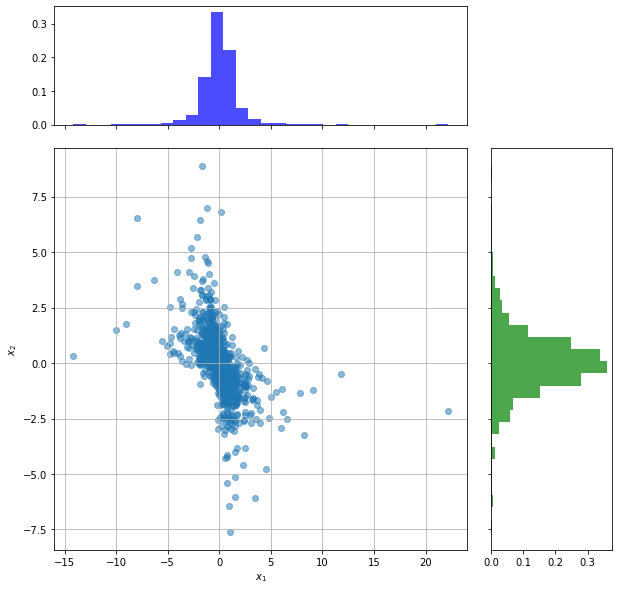

In [3]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x_dist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_y_dist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Main scatter plot
ax_main.scatter(x[0, :], x[1, :], alpha=0.5)
ax_main.grid(True)
ax_main.set_xlabel('$x_1$')
ax_main.set_ylabel('$x_2$')

# Hide the tick labels for marginal plots
ax_x_dist.tick_params(axis="x", labelbottom=False)
ax_y_dist.tick_params(axis="y", labelleft=False)

# Plot X distribution (top)
ax_x_dist.hist(x[0, :], bins=30, density=True, alpha=0.7, color='blue')


# Plot Y distribution (right)
ax_y_dist.hist(x[1, :], bins=30, density=True, alpha=0.7, color='green', orientation='horizontal')

plt.show()

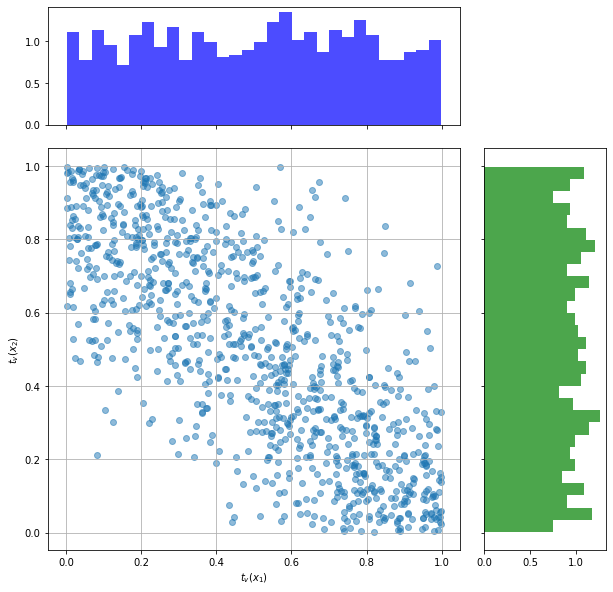

In [4]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x_dist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_y_dist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Main scatter plot
ax_main.scatter(u1, u2, alpha=0.5)
ax_main.grid(True)
ax_main.set_xlabel('$t_v(x_1)$')
ax_main.set_ylabel('$t_v(x_2)$')

# Hide the tick labels for marginal plots
ax_x_dist.tick_params(axis="x", labelbottom=False)
ax_y_dist.tick_params(axis="y", labelleft=False)

# Plot X distribution (top)
ax_x_dist.hist(u1, bins=30, density=True, alpha=0.7, color='blue')


# Plot Y distribution (right)
ax_y_dist.hist(u2, bins=30, density=True, alpha=0.7, color='green', orientation='horizontal')

plt.show()

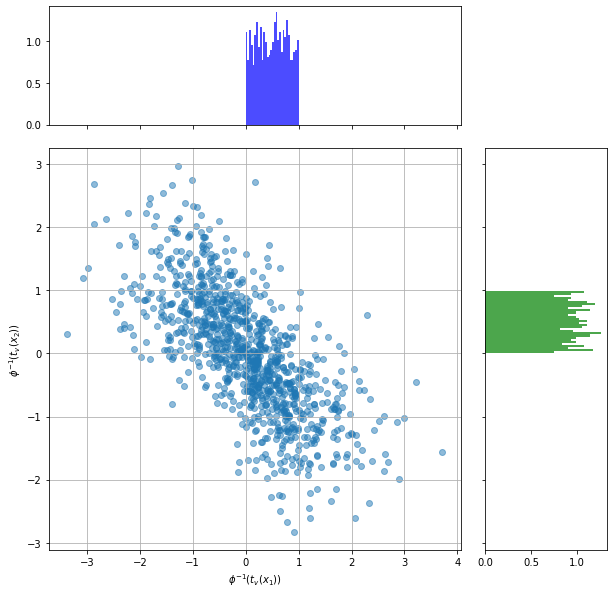

In [5]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x_dist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_y_dist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Main scatter plot
ax_main.scatter(norm.ppf(u1), norm.ppf(u2), alpha=0.5)
ax_main.grid(True)
ax_main.set_xlabel('$\phi^{-1}(t_v(x_1))$')
ax_main.set_ylabel('$\phi^{-1}(t_v(x_2))$')

# Hide the tick labels for marginal plots
ax_x_dist.tick_params(axis="x", labelbottom=False)
ax_y_dist.tick_params(axis="y", labelleft=False)

# Plot X distribution (top)
ax_x_dist.hist(u1, bins=30, density=True, alpha=0.7, color='blue')


# Plot Y distribution (right)
ax_y_dist.hist(u2, bins=30, density=True, alpha=0.7, color='green', orientation='horizontal')

plt.show()

In [ ]:
t = np.arange(0,1.00,0.001)
sig = np.array([[0.2], [0.2]])
S0 = np.array([[10], [15]])
r = 0.03
S_t = np.zeros((2,1000))
t_tile = np.tile(t,(2,1))
S_t = S0*np.exp((r - (1/2)*sig)*t_tile + sig * np.sqrt(t_tile) * np.cumsum(X.T,axis=1))

In [ ]:
plt.plot(t, S_t[0,:])
plt.plot(t, S_t[1,:])

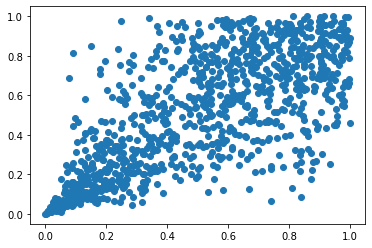

In [4]:
n=2
Y = np.random.exponential(scale=1, size=(n,1000))

a=2.3
Z = np.random.gamma(shape=1/a, scale=1, size =(1,1000))

U = np.zeros((n,1000))
for i in range(n):
    U[i,:] = (1 + (Y[i]/Z[0,:]))**(-1/a)
U.shape
plt.scatter(U[0,:],U[1,:])

array([[ 1.        , -0.70732213],
       [-0.70732213,  1.        ]])

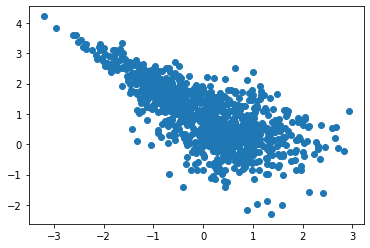

In [5]:
plt.scatter(norm.ppf(U[0,:]), 1 - norm.ppf(U[1,:]))
np.corrcoef(norm.ppf(U[0,:]), 1 - norm.ppf(U[1,:]))

In [6]:
n = 1000
a = 2
uniform = np.random.uniform(low=0.0, high=1.0, size=(n,2))
u1 = uniform[:,0]
v2 = uniform[:,1]
A = a*(2*u1 - 1) - 1
B = (1 - a*(2*u1 - 1))**2 + 4*a*v2*(2*u1 - 1)
u2 = 2*v2/(np.sqrt(B) - A)

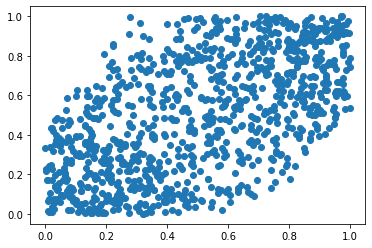

In [7]:
plt.scatter(u1,u2)

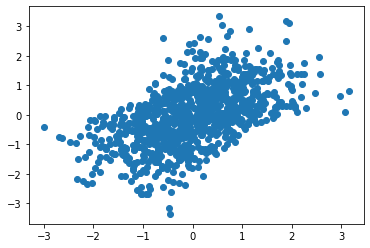

In [8]:
plt.scatter(norm.ppf(u1), norm.ppf(u2))

In [9]:
import numpy as np

# Define matrix size
n = 5
# Create a random matrix A
A = np.random.rand(n, n)
A_trans = A * 2 - 1

# Create a symmetric positive definite matrix using A^T * A
M = np.dot(A_trans.T, A_trans)

# Normalize the diagonal to be ones
diagonal = np.sqrt(np.diag(M))
M_normalised = M / diagonal[:, None] / diagonal[None, :]

# Check if the diagonal elements are ones
print("Diagonal elements:", np.diag(M_normalised))

# Check eigenvalues to confirm positive definiteness
eigenvalues = np.linalg.eigvals(M_normalised)
print("Eigenvalues:", eigenvalues)
M_normalised
print(np.diag(M))

Diagonal elements: [1. 1. 1. 1. 1.]
Eigenvalues: [2.27192709 1.56323633 0.83873429 0.06806277 0.25803952]
[1.77011223 2.00013926 1.12556153 2.64916276 1.22496603]


In [10]:
n = 5

# Generate n - 1 random numbers between 0 and 1
random_numbers = np.random.rand(n - 1)

# Append 0 at the start and 1 at the end to define the range of the entire interval
random_numbers = np.append(random_numbers, [1])
random_numbers = np.insert(random_numbers, 0, [0])

# Sort the random numbers to ensure the differences between them sum up to 1
random_numbers.sort()

# Calculate the differences between consecutive numbers to get n numbers that sum up to 1
alpha = np.diff(random_numbers)

sum(alpha)
print(alpha)

[0.2252617  0.05057687 0.40168221 0.17638069 0.14609853]


In [13]:
# Cholesky decomposition
A = np.linalg.cholesky(M_normalised)

# Generate independent standard normal random variables
Z = (rng.standard_normal(size=(1000, n))).T  # 100 samples for each variable

# Create correlated normal random variables
X = A.dot(Z)

# Transform to uniform marginals using the CDF of the standard normal
U_norm = stats.norm.cdf(X)

t = np.arange(0, 1.00, 0.001)
sig = np.random.uniform(0.2, 0.4, n).reshape(n, 1)
S0 = np.full((n, 1), 5)
r = 0.02
S_t = np.zeros((n, len(t)))
t_tile = np.tile(t, (n, 1))
epsilon = 3.5
d = 0.1

# Initialize a vector to track if the reduction has been applied for each asset
reduction_applied = np.full(n, False)

# Set the initial values for all assets to 5 at t[0]
S_t[:, 0] = S0[:, 0]

for i in range(1, len(t)):  # Loop over time steps
    reduction_needed = False  # Initialize reduction_needed at the start of each time step
    for asset in range(n):  # Loop over assets
        if S_t[asset, i-1] != 0:  # Check if the asset hasn't already fallen to 0
            # Calculate S_t for the asset at the next time step
            S_t[asset, i] = S_t[asset, i-1] * np.exp((r - 0.5 * sig[asset, 0]**2) * (t[i] - t[i-1]) + sig[asset, 0] * np.sqrt(t[i] - t[i-1]) * X[asset, i-1])
        
        # Check if the asset falls below epsilon and hasn't triggered a reduction yet
        if S_t[asset, i] <= epsilon and not reduction_applied[asset]:
            S_t[asset, i] = 0  # Set the triggering asset to 0 immediately
            reduction_needed = True  # Indicate that a reduction is needed for this time step
            reduction_applied[asset] = True  # Mark that the reduction has been applied for this asset

    # After checking all assets, apply the reduction if needed
    if reduction_needed:
        for other_asset in range(n):
            if not reduction_applied[other_asset]:  # Apply reduction only to other assets
                S_t[other_asset, i] = S_t[other_asset, i] * (1 - d)  # Apply the reduction factor correctly


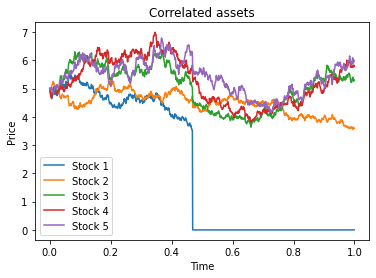

In [14]:
for i in range(n):
    plt.plot(t, S_t[i, :], label=f"Stock {i + 1}")  

plt.title('Correlated assets')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()  
plt.show()  


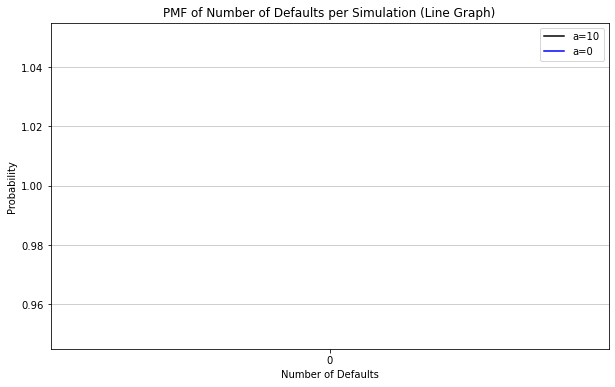

In [21]:
def count_defaults(asset_prices, threshold):

    # Check if prices fall below the threshold
    below_threshold = asset_prices < threshold
    # Count the number of assets that fall below the threshold at any time
    defaults = np.sum(np.any(below_threshold, axis=1))
    return defaults

n_simulations = 100  # Number of simulations
n_assets = 10  # Number of assets
S0 = np.full((n, 1), 5)
S_t = np.zeros((n, len(t)))
S_t[:, 0] = S0[:, 0]
epsilon = 3.5  # Default threshold
h = 10**-4  # Step size
t = np.arange(0, 1.00, h)  # Time array
a = 0  # Drift parameter
sig = 0.2 # Volatility parameter
d = 0.1

defaults_per_simulation = np.zeros(n_simulations)

for sim in range(n_simulations):
    rng = np.random.default_rng(sim)
    Z = rng.standard_normal(size=(len(t), n_assets)).T
    X = 5 * np.ones((n_assets, len(t)))
    for i in range(1, len(t)):  # Loop over time steps
        reduction_needed = False  # Initialize reduction_needed at the start of each time step
        for asset in range(n):  # Loop over assets
            if S_t[asset, i-1] != 0:  # Check if the asset hasn't already fallen to 0
            # Calculate S_t for the asset at the next time step
                S_t[asset, i] = S_t[asset, i-1] * np.exp((r - 0.5 * sig**2) * (t[i] - t[i-1]) + sig * np.sqrt(t[i] - t[i-1]) * X[asset, i-1])
        
        # Check if the asset falls below epsilon and hasn't triggered a reduction yet
            if S_t[asset, i] <= epsilon and not reduction_applied[asset]:
                S_t[asset, i] = 0  # Set the triggering asset to 0 immediately
                reduction_needed = True  # Indicate that a reduction is needed for this time step
                reduction_applied[asset] = True  # Mark that the reduction has been applied for this asset

    # After checking all assets, apply the reduction if needed
        if reduction_needed:
            for other_asset in range(n):
                if not reduction_applied[other_asset]:  # Apply reduction only to other assets
                    S_t[other_asset, i] = S_t[other_asset, i] * (1 - d)  # Apply the reduction factor correctly

    defaults = count_defaults(S_t, epsilon)
    defaults_per_simulation[sim] = defaults

# Given: defaults_per_simulation, an array of counts of defaults per simulation

# Calculate the frequencies of each count of defaults
unique_counts, counts_frequencies = np.unique(defaults_per_simulation, return_counts=True)

# Normalize the frequencies to get probabilities (PMF)
probabilities = counts_frequencies / n_simulations

# Example usage within a Monte Carlo simulation context
n_simulations = 100  # Number of simulations
n_assets = 10  # Number of assets
S0 = np.full((n, 1), 5)
S_t = np.zeros((n, len(t)))
S_t[:, 0] = S0[:, 0]
epsilon = 3.5  # Default threshold
h = 10**-4  # Step size
t = np.arange(0, 1.00, h)  # Time array
a = 10 # Drift parameter
reduction_applied = np.full(n, False)
sig = 0.2  # Volatility parameter
d = 0.01
defaults_per_simulation_10 = np.zeros(n_simulations)

for sim in range(n_simulations):
    rng = np.random.default_rng(sim)
    Z = rng.standard_normal(size=(len(t), n_assets)).T
    X = 5 * np.ones((n_assets, len(t)))
    for i in range(1, len(t)):  # Loop over time steps
        reduction_needed = False  # Initialize reduction_needed at the start of each time step
        for asset in range(n):  # Loop over assets
            if S_t[asset, i-1] != 0:  # Check if the asset hasn't already fallen to 0
            # Calculate S_t for the asset at the next time step
                S_t[asset, i] = S_t[asset, i-1] * np.exp((r - 0.5 * sig**2) * (t[i] - t[i-1]) + sig * np.sqrt(t[i] - t[i-1]) * X[asset, i-1])
        
        # Check if the asset falls below epsilon and hasn't triggered a reduction yet
            if S_t[asset, i] <= epsilon and not reduction_applied[asset]:
                S_t[asset, i] = 0  # Set the triggering asset to 0 immediately
                reduction_needed = True  # Indicate that a reduction is needed for this time step
                reduction_applied[asset] = True  # Mark that the reduction has been applied for this asset

    # After checking all assets, apply the reduction if needed
            if reduction_needed:
                for other_asset in range(n):
                    if not reduction_applied[other_asset]:  # Apply reduction only to other assets
                        S_t[other_asset, i] = S_t[other_asset, i] * (1 - d)  # Apply the reduction factor correctly

    defaults = count_defaults(S_t, epsilon)
    defaults_per_simulation_10[sim] = defaults

# Given: defaults_per_simulation, an array of counts of defaults per simulation

# Calculate the frequencies of each count of defaults
unique_counts_10, counts_frequencies_10 = np.unique(defaults_per_simulation_10, return_counts=True)

# Normalize the frequencies to get probabilities (PMF)
probabilities_10 = counts_frequencies_10 / n_simulations
plt.figure(figsize=(10, 6))
plt.plot(unique_counts_10, probabilities_10, color = 'black',label='a=10')
plt.plot(unique_counts, probabilities, color='blue', label='a=0')
plt.xlabel('Number of Defaults')
plt.ylabel('Probability')
plt.title('PMF of Number of Defaults per Simulation (Line Graph)')
plt.xticks(unique_counts)  # Ensure we have a tick for each unique count of defaults
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()


In [13]:
def gaussCopula(u1, u2, R):
    sig = np.array([[1,R], [R,1]])
    
    dist = stats.multivariate_normal(mean = None, cov = sig)
    phi1 = stats.norm.ppf(u1)
    phi2 = stats.norm.ppf(u2)
    
    return dist.cdf([phi1, phi2])
    
gaussCopula(0.5, 0.6, 0.8)

0.44094419625250114

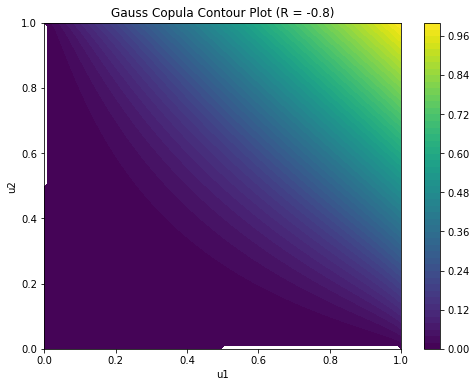

In [28]:
def gaussCopula_mesh(u1, u2, R):
    Z = np.zeros_like(u1)
    for i in range(u1.shape[0]):
        for j in range(u2.shape[1]):
            Z[i, j] = gaussCopula(u1[i, j], u2[i, j], R)
    return Z

# Set the correlation parameter
R = -0.8 # Example value, can be adjusted

# Create a grid of values for u1 and u2
u1_values = np.linspace(0, 1, 100)
u2_values = np.linspace(0, 1, 100)
U1, U2 = np.meshgrid(u1_values, u2_values)

# Compute the Gauss Copula values using the adjusted function
Z = gaussCopula_mesh(U1, U2, R)

# Plot the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(U1, U2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title(f'Gauss Copula Contour Plot (R = {R})')
plt.xlabel('u1')
plt.ylabel('u2')
plt.show()

In [22]:
import pandas
import pandas_datareader as pdr

In [23]:
assets = pdr.DataReader(['MSFT','AAPL'], 'stooq', start='03-31-2021')
#print(assets)
assets = assets.drop(['High','Low', 'Open','Volume'], axis=1)
log_ret = np.log(assets.Close.shift(1)) - np.log(assets.Close)
log_ret = log_ret.iloc[1:]


In [24]:
sigma = np.cov(log_ret.MSFT, log_ret.AAPL)
rho = np.corrcoef(log_ret[['MSFT', 'AAPL']].T)
print(rho)
print(sigma)

[[1.         0.71270426]
 [0.71270426 1.        ]]
[[0.00029749 0.00020742]
 [0.00020742 0.00028471]]


In [25]:
mu_MSFT = np.mean(log_ret.MSFT)
mu_AAPL = np.mean(log_ret.AAPL)
sig_MSFT = np.sqrt(sigma[0,0])
sig_AAPL = np.sqrt(sigma[1,1])
print(sig_MSFT); print(sig_AAPL)

0.017247904010415656
0.016873260660192638


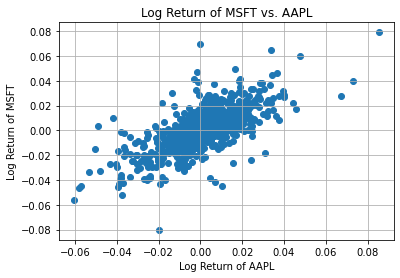

In [26]:
plt.scatter(log_ret['AAPL'], log_ret['MSFT'])
plt.title('Log Return of MSFT vs. AAPL')
plt.xlabel('Log Return of AAPL')
plt.ylabel('Log Return of MSFT')
plt.grid(True)
plt.show()

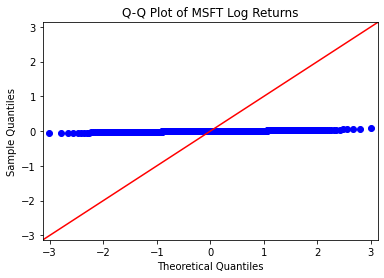

In [70]:
import statsmodels.api as sm
sm.qqplot(log_ret.AAPL, line='45')
plt.title('Q-Q Plot of MSFT Log Returns')
plt.show()

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata

def empirical_copula(u1, u2, M, ranks):
    m1 = M * u1
    m2 = M * u2
    both_less = (ranks[0] <= m1) & (ranks[1] <= m2)  # Assuming ranks is a list of 2 arrays
    
    rows_keep = np.sum(both_less)
    
    return rows_keep / M


In [28]:
x = norm.cdf(log_ret.MSFT, loc = mu_MSFT, scale = sig_MSFT)
y = norm.cdf(log_ret.AAPL, loc = mu_AAPL, scale = sig_AAPL)

xRank = stats.rankdata(x, axis=0)
yRank = stats.rankdata(y, axis=0)
len(x)

757

In [29]:
tau,p_val = stats.kendalltau(xRank,yRank)
print(tau)

0.5394143888344763


In [43]:
empirical_copula(x,y,len(x),[xRank,yRank])

0.27873183619550856

In [54]:
def C_FGM(u,v,a):
    return u*v + a*u*(1-u)*v*(1-v)
a = tau*(9/2)

In [30]:
print(tau*(9/2))
print((2*tau)/(1-tau))
print(1/(1-tau))
print(np.sin(np.pi*tau/2))

2.4273647497551436
2.3422980473466137
2.1711490236733066
0.7495024275289688


In [56]:
def C_Clay(u,v,a):
    return (u**(-a) + v**(-a) -1)**(-1/a)
a = (2*tau)/(1-tau)
C_Clay(1,1,a)

1.0

In [59]:
def C_Gum(u,v,a):
    return np.exp(-((-np.log(u))**a + (-np.log(v))**a)**(1/a))
a = 1/(1-tau)
C_Gum(0,0,a)

<ipython-input-59-68d53cccc563>:2: RuntimeWarning: divide by zero encountered in log
  return np.exp(-((-np.log(u))**a + (-np.log(v))**a)**(1/a))


0.0

In [17]:
def C_Frank(u,v,a):
    return (-1/a)*np.log(1+((np.exp(-au) -1)*(np.exp(-av)-1))/(np.exp(-a)-1))

In [61]:
import numpy as np
from scipy.integrate import dblquad

import numpy as np
from scipy.stats import norm, multivariate_normal

def gaussian_copula(u, v, R):
    """
    Compute the Gaussian copula value for inputs u and v with correlation matrix R.

    Parameters:
    - u: float or np.ndarray, the first uniform marginal value(s) in [0, 1].
    - v: float or np.ndarray, the second uniform marginal value(s) in [0, 1].
    - R: np.ndarray, the 2x2 correlation matrix.

    Returns:
    - float or np.ndarray: Copula value in [0, 1].
    """
    # Convert u and v from uniform to Gaussian using the inverse CDF (quantile function)
    z_u = norm.ppf(u)
    z_v = norm.ppf(v)

    # Define the joint distribution with the given correlation matrix
    mvn = multivariate_normal(mean=[0, 0], cov=R)

    # Compute the joint CDF of z_u and z_v
    copula_value = mvn.cdf([z_u, z_v])

    return copula_value

# Example usage:
R = np.array([[1, 0.5], [0.5, 1]])  # Example correlation matrix
u = 0.99  # Example u value
v = 0.8  # Example v value

copula_value = gaussian_copula(u, v, R)
print("Copula Value:", copula_value)


Copula Value: 0.7971130480484929


In [63]:
from scipy.stats import multivariate_t, t

def t_copula(u, v, nu, R):
    # Transform u and v using the inverse t-distribution function
    z_u = t.ppf(u, df=nu)
    z_v = t.ppf(v, df=nu)
    
    try:
        # Attempt to create a multivariate_t instance with assumed correct parameters
        mvn_t = multivariate_t(loc=[0, 0], shape=R, df=nu)
    except TypeError as e:
        print(f"An error occurred: {e}")
        print("Please check the documentation for the correct parameters to use with your version of scipy.stats.multivariate_t.")
        return None
    
    # Calculate the copula value using the cdf method
    value = multivariate_normal([z_u, z_v])
    
    return value
R = np.array([[1, 0.5], [0.5, 1]]) 
t_copula(0.5, 0.5, 5, R )

In [64]:
R = np.array([[1, np.sin(np.pi*tau/2)], [np.sin(np.pi*tau/2), 1]]) 


M = len(x) # Example value for M

# Compute the sum of squared differences
sum_squared_diff = 0
for m1 in range(1,M+1):
    for m2 in range(1,M+1):
        u = m1 / M
        v = m2 / M
        diff = empirical_copula(u, v, M, [xRank,yRank]) - gaussian_copula(u, v, R)
        sum_squared_diff += diff**2

# Compute the root-mean-square error
rmse = np.sqrt(sum_squared_diff)

print(f"$d_2$: {rmse}")

# FGM : 11.79025021125233
# Clay: 7.784524580708339
# Gumbel: 5.939966002753592
# Gaussian: 3.1625877373485864

$d_2$: 3.1625877373485864


In [32]:
import scipy
print(scipy.__version__)


1.6.0


In [31]:
conda install scipy=1.6.0

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
